### Drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Install

In [ ]:
!pip install -Uqq fastbook

### Import

In [ ]:
from fastai.vision.all import *
from fastai.vision.widgets import *
from fastbook import *

### Data directory

In [ ]:
path = "/content/drive/MyDrive/CDC_flagID/data_codes/data_fastai_test"

### Total images

In [ ]:
files = get_image_files(path)
len(files)

745

### Confirm that files can be opened

In [ ]:
failed = verify_images(files)
failed

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


(#0) []

In [ ]:
#birds = []

### Config datablock

*   Set test and training split
*   resize data


In [ ]:
birds = DataBlock(blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(224))

### Select and apply resize methods

In [ ]:
birds = birds.new(item_tfms=Resize(256, ResizeMethod.Squish))

In [ ]:
birds = birds.new(item_tfms=Resize(256, ResizeMethod.Pad, pad_mode='zeros'))

In [ ]:
birds = birds.new(item_tfms=RandomResizedCrop(256, min_scale=0.3))

### Data augmentation

In [ ]:
birds = birds.new(
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=1))#(mult=2)

### Create an iterable dataset

In [ ]:
dls = birds.dataloaders(path)

### Show batch preview

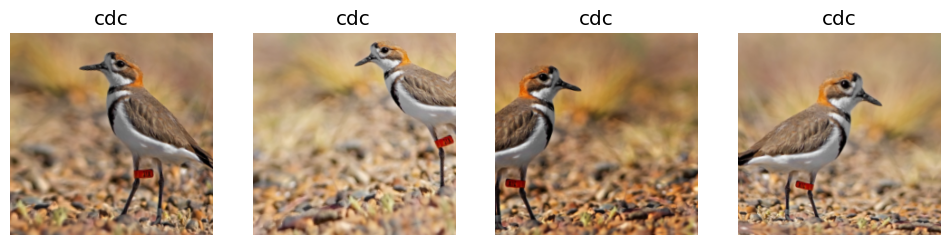

In [ ]:
dls.train.show_batch(max_n=4, nrows=1, unique=True)

### Create learner


In [ ]:
learn = vision_learner(dls, resnet50, metrics=[error_rate, accuracy, Precision(), Recall(), F1Score()])

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 165MB/s]


### Results

In [ ]:
learn.fine_tune(20)

epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.684076,0.109184,0.040268,0.959732,0.957143,0.957143,0.957143,02:42


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


epoch,train_loss,valid_loss,error_rate,accuracy,precision_score,recall_score,f1_score,time
0,0.147081,0.042861,0.020134,0.979866,1.000000,0.957143,0.978102,01:15
1,0.133598,0.080780,0.040268,0.959732,0.984848,0.928571,0.955882,01:12
2,0.102847,0.068527,0.026846,0.973154,0.985294,0.957143,0.971014,01:13
3,0.089307,0.078062,0.026846,0.973154,0.971429,0.971429,0.971429,01:12
4,0.083256,0.048716,0.020134,0.979866,1.000000,0.957143,0.978102,01:13
5,0.072051,0.057963,0.020134,0.979866,1.000000,0.957143,0.978102,01:12
6,0.061244,0.038145,0.013423,0.986577,0.985714,0.985714,0.985714,01:11
7,0.050179,0.033018,0.020134,0.979866,0.958904,1.000000,0.979021,01:12
8,0.041525,0.030314,0.020134,0.979866,0.958904,1.000000,0.979021,01:11
9,0.035509,0.031908,0.013423,0.986577,0.972222,1.000000,0.985915,01:15


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os

### Loss function

In [ ]:
 learn.loss_func

FlattenedLoss of CrossEntropyLoss()

### Plot loss function

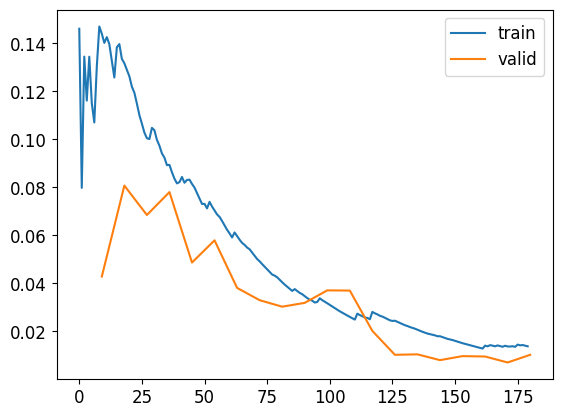

In [ ]:
learn.recorder.plot_loss(skip_start=0, with_valid=True)

In [ ]:
learn.lr_find()

### Generate confusion matrix

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


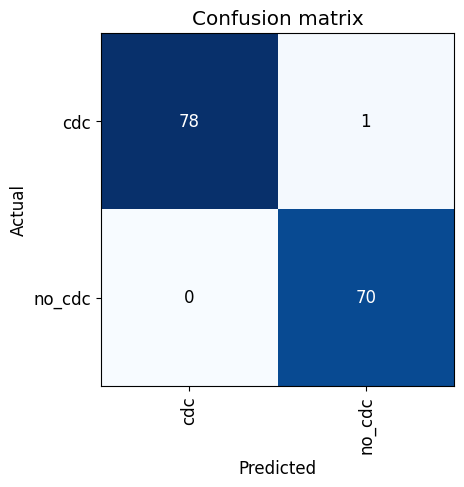

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Show prediction cases

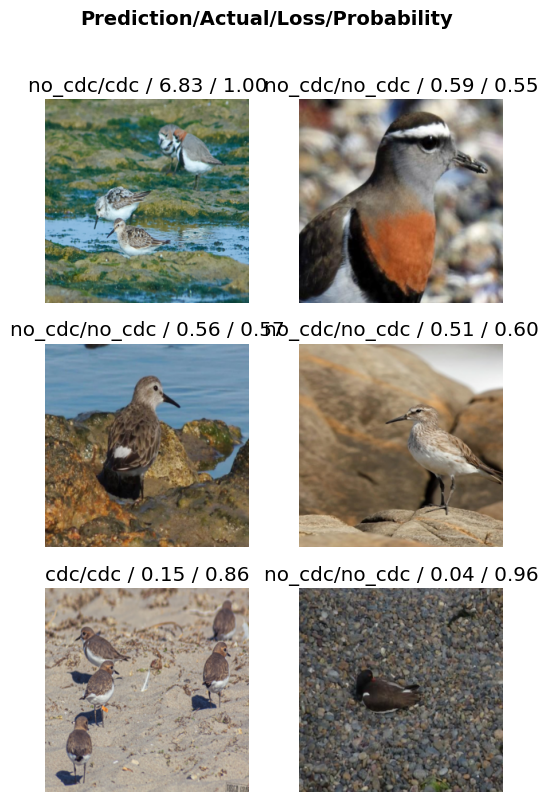

In [ ]:
interp.plot_top_losses(6, nrows=3)

### Export model

In [ ]:
learn.export()

### Check exported file

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

### Predict from exported model

In [ ]:
learn_inf = load_learner(path/'export.pkl')
learn_inf.predict('/content/drive/MyDrive/CDC_flagID/data_codes/data_fastai_test/no_cdc/1777.jpeg')

('no_cdc', tensor(1), tensor([1.2981e-07, 1.0000e+00]))